In [26]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation


In [27]:
train = pd.read_csv('D:\\Dropbox\\GitHub\\deepstudy\\ko\\data/train.csv')
x_test = pd.read_csv('D:\\Dropbox\\GitHub\\deepstudy\\ko\\data/test (1).csv')
y_test = pd.read_csv('D:\\Dropbox\\GitHub\\deepstudy\\ko\\data/y_test.csv')

In [28]:
print(train.shape, x_test.shape, y_test.shape)

(891, 12) (418, 11) (418, 2)


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
x_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [32]:
train.Pclass = train.Pclass.astype('category')
train.Sex = train.Sex.astype('category')
train.Embarked = train.Embarked.astype('category')

x_test.Pclass = x_test.Pclass.astype('category')
x_test.Sex = x_test.Sex.astype('category')
x_test.Embarked = x_test.Embarked.astype('category')

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 37.9 KB


In [34]:
imputer_Age = SimpleImputer(strategy='mean')
imputer_Embarked = SimpleImputer(strategy='most_frequent')

scaler = MinMaxScaler()

pipeline = Pipeline([
    ('imputer_Age', imputer_Age),
    ('Scaler', scaler)
])



train.Age = pipeline.fit_transform(train[['Age']])
train.Embarked = imputer_Embarked.fit_transform(train[['Embarked']])

x_test.Age = pipeline.fit_transform(x_test[['Age']])
x_test.Embarked = imputer_Embarked.fit_transform(x_test[['Embarked']])


In [35]:
train.Embarked = train.Embarked.astype('category')
x_test.Embarked = x_test.Embarked.astype('category')

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 37.9 KB


In [37]:
Sex = pd.get_dummies(train.Sex)
Pclass = pd.get_dummies(train.Pclass)
Embarked = pd.get_dummies(train.Embarked)

Sex_1 = pd.get_dummies(x_test.Sex)
Pclass_1 = pd.get_dummies(x_test.Pclass)
Embarked_1 = pd.get_dummies(x_test.Embarked)

In [38]:
join = pd.concat([Sex, Pclass, Embarked], axis=1)
train = pd.concat([train, join], axis = 1)
train.drop(['Sex', 'Pclass', 'Embarked'], axis=1, inplace=True)
train

join_1 = pd.concat([Sex_1, Pclass_1, Embarked_1], axis=1)
x_test = pd.concat([x_test, join_1], axis = 1)
x_test.drop(['Sex', 'Pclass', 'Embarked'], axis = 1, inplace = True)

In [39]:
scaler_2 = MinMaxScaler()
train.Fare = scaler_2.fit_transform(train[['Fare']])
x_test.Fare = scaler_2.fit_transform(x_test[['Fare']])
train

,Survived,Age,SibSp,Parch,Fare,female,male,1,2,3,C,Q,S
0,0,0.271174,1,0,0.014151,0,1,0,0,1,0,0,1
1,1,0.472229,1,0,0.139136,1,0,1,0,0,1,0,0
2,1,0.321438,0,0,0.015469,1,0,0,0,1,0,0,1
3,1,0.434531,1,0,0.103644,1,0,1,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0,1,0,1,0,0,0,1
887,1,0.233476,0,0,0.058556,1,0,1,0,0,0,0,1
888,0,0.367921,1,2,0.045771,1,0,0,0,1,0,0,1
889,1,0.321438,0,0,0.058556,0,1,1,0,0,1,0,0


In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation


In [42]:
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']


In [43]:
model = models.Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (12,)))
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               6500      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 7,433
Trainable params: 7,433
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 500, batch_size=32, validation_split=0.2)


Epoch 1/500
23/23 [==============================] - 1s 14ms/step - loss: 0.6409 - accuracy: 0.6390 - val_loss: 0.5305 - val_accuracy: 0.7709
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.7514 - val_loss: 0.4477 - val_accuracy: 0.8324
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.7837 - val_loss: 0.4073 - val_accuracy: 0.8268
Epoch 4/500
23/23 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.7781 - val_loss: 0.4001 - val_accuracy: 0.8212
Epoch 5/500
23/23 [==============================] - 0s 4ms/step - loss: 0.4666 - accuracy: 0.7907 - val_loss: 0.3947 - val_accuracy: 0.8324
Epoch 6/500
23/23 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.8006 - val_loss: 0.3889 - val_accuracy: 0.8436
Epoch 7/500
23/23 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.7879 - val_loss: 0.3868 - val_accuracy: 0.8324
Epoch 8/500


In [47]:
y_test = y_test['Survived']

In [49]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

14/14 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.8660
Accuracy: 86.60


In [50]:
y_pred = model.predict(x_test)
y_pred

14/14 [==============================] - 0s 615us/step


array([[2.71619111e-02],
       [4.24852699e-01],
       [1.05703995e-02],
       [1.26542687e-01],
       [4.85885441e-01],
       [1.55525059e-01],
       [7.80562937e-01],
       [1.37392245e-02],
       [6.01389170e-01],
       [1.48591055e-02],
       [1.33040696e-01],
       [3.47999662e-01],
       [9.99950171e-01],
       [4.14496921e-02],
       [9.99983609e-01],
       [9.95239377e-01],
       [3.71637638e-03],
       [3.14782113e-01],
       [4.33307052e-01],
       [4.70324159e-01],
       [8.33821535e-01],
       [5.10609031e-01],
       [9.99755919e-01],
       [9.59347904e-01],
       [9.99681592e-01],
       [2.90041491e-02],
       [9.99173641e-01],
       [2.80775368e-01],
       [4.17370349e-01],
       [2.30966285e-02],
       [5.79995364e-02],
       [1.39856115e-02],
       [2.81556785e-01],
       [2.97571629e-01],
       [7.63831377e-01],
       [3.52495790e-01],
       [2.91275293e-01],
       [5.56026936e-01],
       [1.24164358e-01],
       [3.76409650e-01],


In [51]:
y_pred.shape

(418, 1)

In [53]:
from sklearn.metrics import accuracy_score

y_pred = (y_pred > 0.5)

print(accuracy_score(y_test, y_pred.round()))

0.8660287081339713


In [115]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [116]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

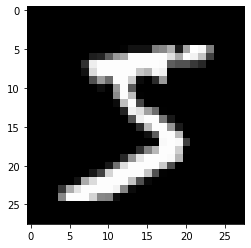

In [117]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = 'gray')

In [122]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [119]:
model = Sequential([
    Conv2D(32, kernel_size = (3,3), activation = 'leaky_relu', input_shape = (28, 28, 1)),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.2),
    Conv2D(64, kernel_size = (3,3), activation = 'leaky_relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.2),
    Conv2D(128, kernel_size = (3,3), activation = 'leaky_relu'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation = 'leaky_relu'),
    Dropout(0.2),
    Dense(10, activation = 'softmax')
]
)


In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

In [121]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
 236/1500 [===>..........................] - ETA: 21s - loss: 2.3101 - accuracy: 0.5941

KeyboardInterrupt: 

In [64]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0582 - accuracy: 0.9832
Accuracy: 98.32


In [65]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 2s 5ms/step


array([[1.49524357e-08, 7.47953788e-09, 4.90925813e-05, ...,
        9.99720514e-01, 5.33504529e-09, 1.89772589e-04],
       [6.08649131e-08, 4.52369129e-08, 9.99999762e-01, ...,
        1.41808245e-08, 1.73988584e-11, 5.25756901e-13],
       [5.88809769e-07, 9.99678373e-01, 3.83723773e-06, ...,
        2.38993904e-04, 3.16164687e-06, 3.70251337e-06],
       ...,
       [3.73224041e-23, 6.95854838e-17, 1.35742678e-24, ...,
        1.91067594e-15, 8.04636780e-14, 2.50681420e-10],
       [8.56029772e-07, 3.44359041e-10, 1.24881228e-09, ...,
        5.01337749e-10, 7.63895048e-04, 5.57390331e-06],
       [1.15065024e-08, 2.66936610e-17, 1.02796426e-11, ...,
        8.20132786e-18, 4.13151416e-15, 8.13713202e-18]], dtype=float32)

In [74]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [75]:
print(accuracy_score(y_test, y_pred))

0.9832


In [76]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset


In [78]:
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

In [79]:
train = TensorDataset(x_train, y_train)
train_loader = DataLoader(train, batch_size = 32, shuffle = True)

In [111]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Dropout(0.2))
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Dropout(0.2))
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.LeakyReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Dropout(0.2))
        self.flatten = nn.Flatten()
        self.linear_1 = nn.Linear(128 * 3 * 3, 128)
        self.linear_2 = nn.Linear(128, 10)
        self.leaky = nn.LeakyReLU()
        self.drop = nn.Dropout(0.2)
        nn.init.xavier_uniform_(self.linear_1.weight)
        nn.init.xavier_uniform_(self.linear_2.weight)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.linear_1(x)
        x = self.leaky(x)
        x = self.drop(x)
        x = self.linear_2(x)
        x = nn.functional.softmax(x, dim = 1)
        return x

In [112]:
model = CNN()

In [113]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [114]:
for epoch in range(10):
    total_loss = 0
    for X, y in train_loader:
        X = X.view(-1, 1, 28, 28)
        optimizer.zero_grad()
        pred = model(X)
        loss = criterion(pred, y.long())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print('Epoch: %d, Loss: %.3f' % (epoch + 1, total_loss))
    

Epoch: 1, Loss: 2885.899
Epoch: 2, Loss: 2799.272
Epoch: 3, Loss: 2790.700
Epoch: 4, Loss: 2787.427


KeyboardInterrupt: 

In [104]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.